# Gerasimov et al. data compilation

This notebook imports, plots, and analyzes detrital zircon data developed from the Miocene stratigraphy of the Berkeley Hills.

## Install required detritalpy module (if necessary)

This code uses detritalpy which can be pip installed using the code cell below. This cell only needs to be run if you don't already have detritalpy installed.

In [ ]:
!pip install detritalpy

## Import required modules
This code imports the required modules
<i>Hint: select a cell with code and Shift+Enter to execute it</i>

In [1]:
import detritalpy
import detritalpy.detritalFuncs as dFunc
import pathlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For improving matplotlib figure resolution
matplotlib.rcParams['pdf.fonttype'] = 42 # For allowing preservation of fonts upon importing into Adobe Illustrator
matplotlib.rcParams['ps.fonttype'] = 42
print('detritalPy version: ',detritalpy.__version__)

detritalPy version:  1.3.26


## Import new and compiled data

In [2]:
# Specify file paths to data input file(s)
dataToLoad = ['../data/LA_ICP_MS/Gerasimov_etal_compiled_dates.xlsx']

main_df, main_byid_df, samples_df, analyses_df = dFunc.loadDataExcel(dataToLoad)

In [3]:
main_df.Sample_ID.unique()

array(['Orinda Fm (OR24-1; this study)',
       'Moraga Fm sediments (MV24-1; this study)',
       'Claremont Fm sandstone (CSUF-4; this study)',
       'Orinda Fm (JG-BH5; Gooley et al., 2021)',
       'Briones Fm (JG-BH8; Gooley et al., 2021)',
       'Great Valley Group (Sharman et al. 2015)',
       'Franciscan Complex (Bero et al., 2020)',
       'Sierra magmatic (Chapman et al., 2012)'], dtype=object)

In [4]:
analyses_df.BestAge.max()

2772.3

## Specify samples
Individual or groups of samples can be selected by entering their unique Sample ID's in an array or tuple (see example below for the correct syntax). This sample list will be used for all subsequent plotting and analysis functions.

In [5]:
sampleList = ['Moraga Fm sediments (MV24-1; this study)',
       'Orinda Fm (OR24-1; this study)',
       'Orinda Fm (JG-BH5; Gooley et al., 2021)',
       'Briones Fm (JG-BH8; Gooley et al., 2021)',
       'Claremont Fm sandstone (CSUF-4; this study)',
       'Great Valley Group (Sharman et al. 2015)',
       'Franciscan Complex (Bero et al., 2020)',
       'Sierra magmatic (Chapman et al., 2012)']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '2sigma');

In [6]:
Moraga_color = '#d0ac80'
Orinda_color = '#f6c98e'
Briones_color = '#ed985f'
Claremont_color = '#93715f'
GVG_color = '#a2dbd7'
Franciscan_color = '#767dbc'
Sierra_color = '#7abc92'

## Plot detrital age distributions
Plot detrital age distributions as cumulative distribution functions (CDFs), probability density plots (PDPs), kernal density estimations (KDEs), and histograms. Plotting options are specified below.

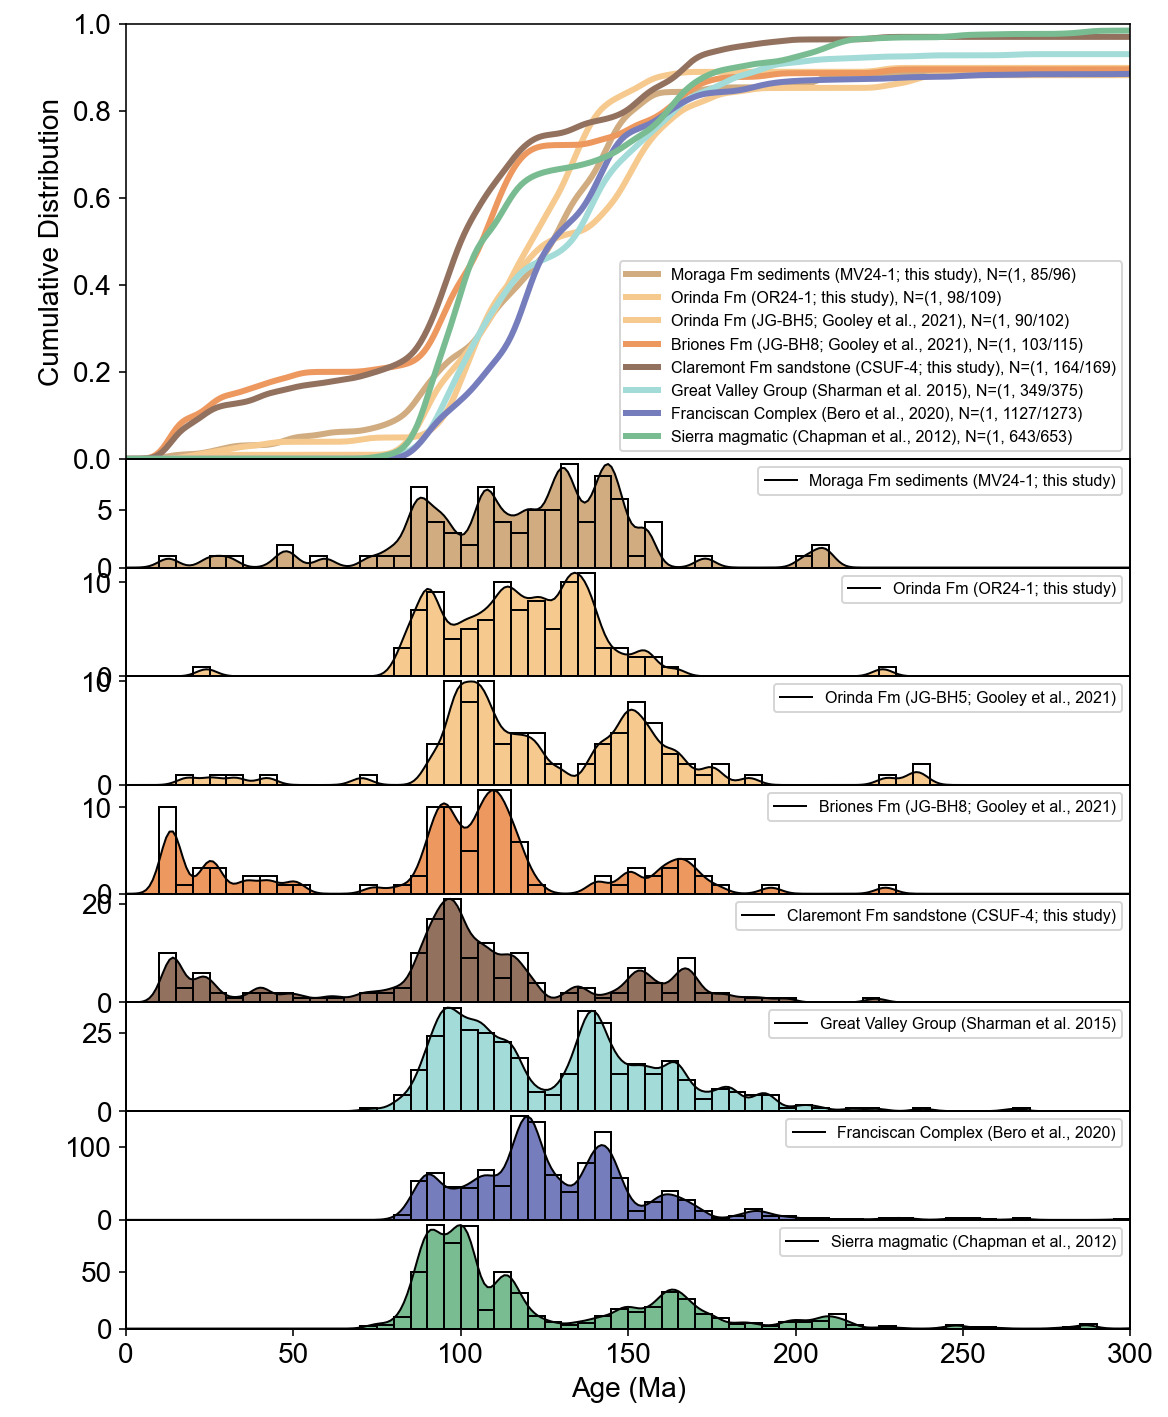

In [7]:
# Enter plot options below
whatToPlot = 'both' # Options: cumulative, relative, or both
separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
x1 = 0
x2 = 300

plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
w = 10 # width of the plot
c = 4 # height of CDF panel
h = 10 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

# Specify the interval (Myr) over which distributions are calculated
xdif = 1 # Note: an interval of 1 Myr is recommended

# Cumulative distribution options
plotCDF = False # Plot the CDF discretized at xdif interval
plotCPDP = False # Plot the cumulative PDP
plotCKDE = True # Plot the cumulative KDE
plotDKW = False # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if equals True (if separateSubplots is True)

plotKDE = True # Set to True if want to plot KDE
colorKDE = True # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = False # Will color KDE according to age populations if set to True
bw = 5 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = False # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = True # Set to True to plot a histogram (only available when separateSubplots is True)
b = 5 # Specify the histogram bin size (Myr)
bw = 3

plotPIE = False # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
agebins = [0, 4500]
agebinsc = ['gainsboro']

plotAgePeaks = False # Will identify and plot age peaks
agePeakOptions = ['KDE', 0.05, 5, 2, True] # [distType, threshold, minDist, minPeakSize, labels]

colors = [Moraga_color,'#f6c98e','#f6c98e','#ed985f','#93715f','#a2dbd7','#767dbc','#7abc92']

fig = dFunc.plotAll(sampleList, 
                    ages, 
                    errors, 
                    numGrains, 
                    labels, 
                    whatToPlot, 
                    separateSubplots, plotCDF, plotCPDP, plotCKDE, 
                    plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar, 
                    plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                    CDFlw=3, KDElw=1, PDPlw=1, colors=colors)

ylim_max_list = []
for ax in fig.axes:
    ax.yaxis.set_label_position("left")
    ax.yaxis.tick_left()
    ylim_min, ylim_max = ax.get_ylim()
    ylim_max_list.append(ylim_max)

fig.savefig('Output/MBH_Figure_3_0to300.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

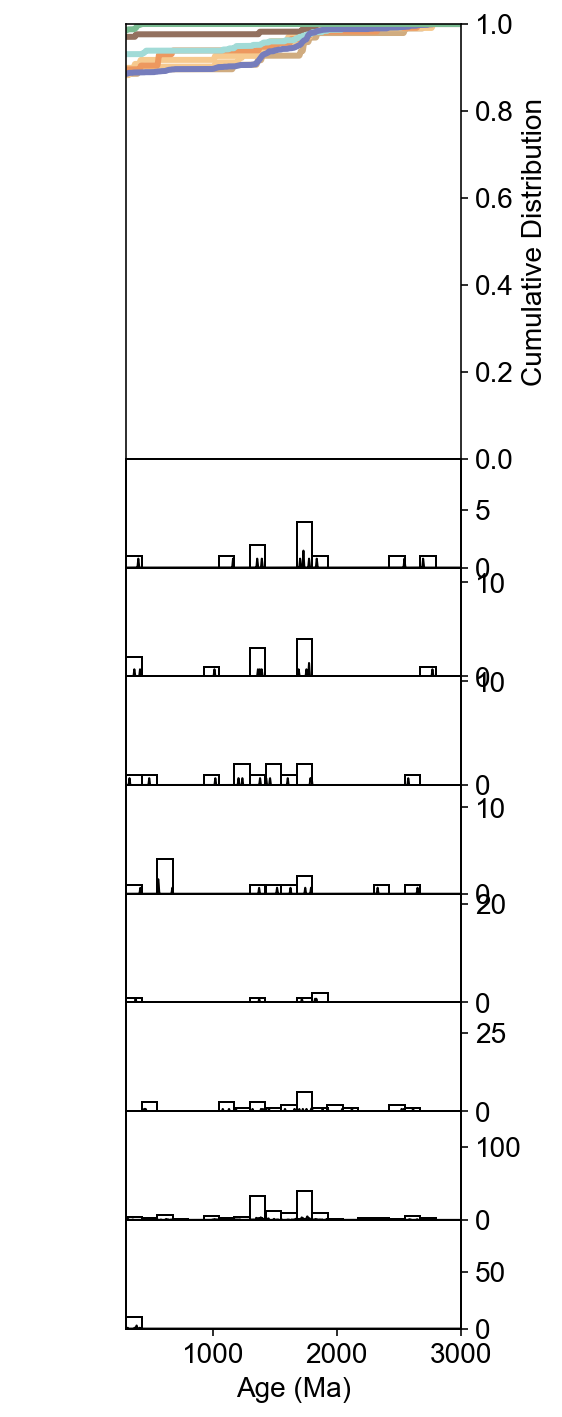

In [8]:
# Enter plot options below
whatToPlot = 'both' # Options: cumulative, relative, or both
separateSubplots = True # Set to True to plot each relative age distribution in a separate subplot (allows histogram and pie)

# Specify the age range (Myr) that you want to plot
x1 = 300
x2 = 3000

plotLog = False # Set to True to plot the x-axis as a log scale

# Specify the plot dimensions
w = 4 # width of the plot
c = 4 # height of CDF panel
h = 10 # height of the relative panel (only required if separateSubplots is False). Options: 'auto' or an integer

# Specify the interval (Myr) over which distributions are calculated
xdif = 1 # Note: an interval of 1 Myr is recommended

# Cumulative distribution options
plotCDF = False # Plot the CDF discretized at xdif interval
plotCPDP = False # Plot the cumulative PDP
plotCKDE = True # Plot the cumulative KDE
plotDKW = False # Plot the 95% confidence interval of the CDF (Dvoretsky-Kiefer-Wolfowitz inequality)

# Relative distribution options
normPlots = False # Will normalize the PDP/KDE if equals True (if separateSubplots is True)

plotKDE = True # Set to True if want to plot KDE
colorKDE = True # Will color KDE according to same coloration as used in CDF plotting
colorKDEbyAge = False # Will color KDE according to age populations if set to True
bw = 5 # Specify the KDE bandwidth. Options are 'optimizedFixed', 'optimizedVariable', or a number (bandwidth in Myr)

plotPDP = False # Set to True if want to plot PDP
colorPDP = False # Will color PDP according to same coloration as used in CDF plotting
colorPDPbyAge = False # Will color PDP according to age populations if set to True

plotColorBar = False # Color age categories as vertical bars, can add white bars to create blank space between other colored bars

plotHist = True # Set to True to plot a histogram (only available when separateSubplots is True)
b = 125# Specify the histogram bin size (Myr)
bw = 3

plotPIE = False # Will plot a pie diagram (only available when separateSubplots is True)

# Specify  age categories for colored KDE, PDP, and/or pie plots
# Sharman et al. 2015 scheme
agebins = [0,4500]
agebinsc = ['gainsboro']

plotAgePeaks = False # Will identify and plot age peaks
agePeakOptions = ['KDE', 0.05, 5, 2, True] # [distType, threshold, minDist, minPeakSize, labels]

colors = ['#d0ac80','#f6c98e','#f6c98e','#ed985f','#93715f','#a2dbd7','#767dbc','#7abc92']

fig = dFunc.plotAll(sampleList, 
                    ages, 
                    errors, 
                    numGrains, 
                    labels, 
                    whatToPlot, 
                    separateSubplots, plotCDF, plotCPDP, plotCKDE, 
                    plotDKW, normPlots, plotKDE, colorKDE, colorKDEbyAge, plotPDP, colorPDP, colorPDPbyAge, plotColorBar, 
                    plotHist, plotLog, plotPIE, x1, x2, b, bw, xdif, agebins, agebinsc, w, c, h, plotAgePeaks, agePeakOptions,
                    CDFlw=3, KDElw=1, PDPlw=1, colors=colors)

n = 0
for ax in fig.axes:
    ax.legend().set_visible(False)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_ylim(0,ylim_max_list[n])
    n = n + 1

fig.savefig('Output/MBH_Figure_3_300to3000.pdf')

## Plot detrital age populations as a bar graph

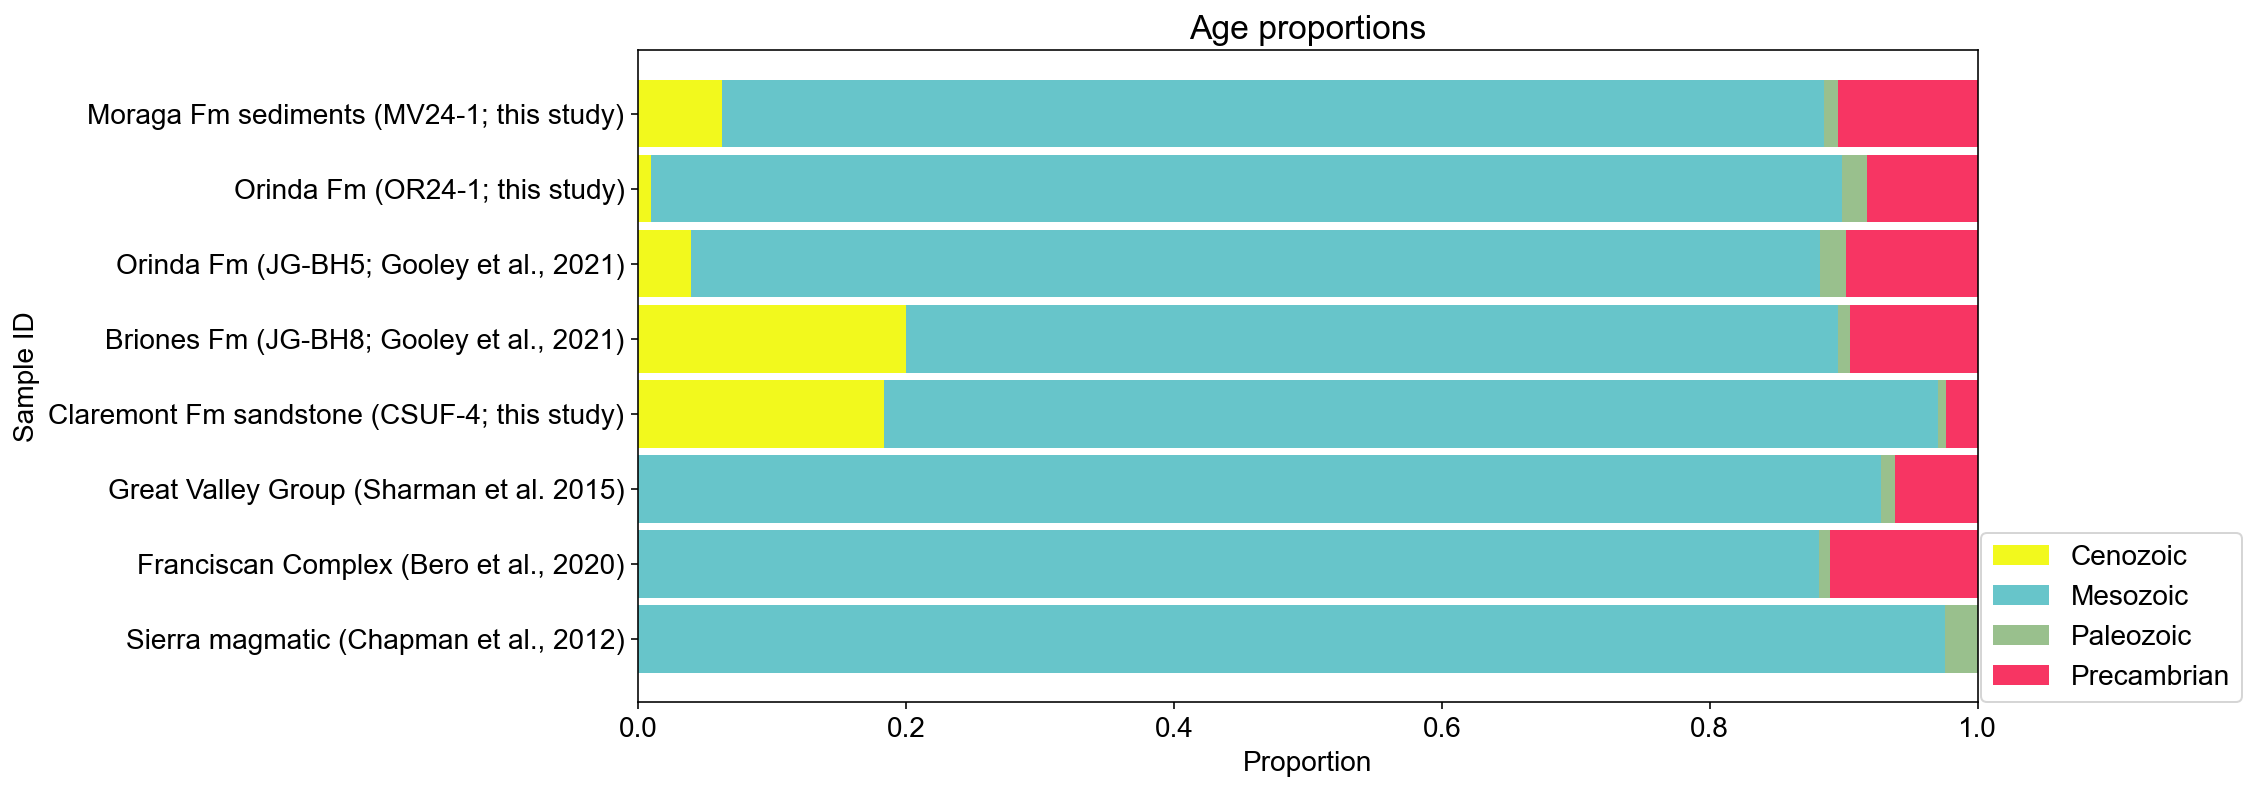

In [9]:
# Specify plot parameters
overlap = 0.9
width = 6
height = 0.75

# Specify  age population boundaries and colors
# Sharman et al. 2015 scheme
agebins = [0, 65, 252, 539, 4500]
agebinsc = [(242/255, 249/255, 29/255),(103/255, 197/255, 202/255),(153/255, 192/255, 141/255),(247/255, 53/255, 99/255)]

# Specify whether to separate grouped sample lists into individual samples
separateGroups = True # Set to True to separate groups into their individual samples

fileName = 'ageProportions.csv' # Specify file name to save

savePlot = True #Specify whether to save output plots as PDF files

dFunc.ageProportionsCSV(ages, errors, numGrains, labels, agebins, fileName)
figBar = dFunc.plotBar(width, height, overlap, main_byid_df, sampleList, ages, numGrains, labels, agebins, agebinsc, separateGroups, savePlot)


from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor=(242/255, 249/255, 29/255),label='Cenozoic'),
                   Patch(facecolor=(103/255, 197/255, 202/255),label='Mesozoic'),
                   Patch(facecolor=(153/255, 192/255, 141/255),label='Paleozoic'),
                   Patch(facecolor=(247/255, 53/255, 99/255),label='Precambrian')]

plt.gca().legend(handles=legend_elements, loc='center',bbox_to_anchor=(0.85, -0.12, 0.5, 0.5),fontsize=14)
plt.show()

## Export sample comparison matrices as a CSV file
Creates matricies of sample comparisons using a number of different metrics (see Saylor and Sundell, 2016). Similiarity, likness, Kolgomorov-Smirnov statistic (Dmax and p-value), Kuiper statistic (Vmax and p-value), and cross-correlation of relative probability density functions. Similiarty, likeness, and cross-correlation values are computed based on either the probability density plot (PDP) or kernal density estimation (KDE).

In [10]:
sampleList = ['Moraga Fm sediments (MV24-1; this study)',
       'Orinda Fm (OR24-1; this study)',
       'Orinda Fm (JG-BH5; Gooley et al., 2021)',
       'Briones Fm (JG-BH8; Gooley et al., 2021)',
       'Claremont Fm sandstone (CSUF-4; this study)',
       'Great Valley Group (Sharman et al. 2015)',
       'Franciscan Complex (Bero et al., 2020)',
       'Sierra magmatic (Chapman et al., 2012)']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '1sigma');

In [11]:
calculateSimilarity = True
calculateLikeness = True
calculateKS = True
calculateKuiper = True
calculateR2 = True
fileName = 'interSampleComparison.csv'

# Specify what type of relative distribution to compare for similarity, likeness, and cross-correlation calculations
distType = 'KDE' # Options are 'PDP' or 'KDE'
bw = 10 # Specify the bandwidth for the KDE distribution. Options are 'optimizedFixed','optimizedVariable', or a number (Ma)

dFunc.calcComparisonCSV(ages, errors, numGrains, labels, sampleList, calculateSimilarity, calculateLikeness,
                        calculateKS, calculateKuiper, calculateR2, fileName, distType, bw)

In [12]:
likeness = pd.read_csv('./Output/interSampleComparison.csv',header=11,nrows=8)
KDE_cross_correlation = pd.read_csv('./Output/interSampleComparison.csv',header=51)
KS_pvalue = pd.read_csv('./Output/interSampleComparison.csv',header=31,nrows=8)
KS_pvalue

,Label,n,Moraga Fm sediments (MV24-1; this study),Orinda Fm (OR24-1; this study),"Orinda Fm (JG-BH5; Gooley et al., 2021)","Briones Fm (JG-BH8; Gooley et al., 2021)",Claremont Fm sandstone (CSUF-4; this study),Great Valley Group (Sharman et al. 2015),"Franciscan Complex (Bero et al., 2020)","Sierra magmatic (Chapman et al., 2012)"
0,Moraga Fm sediments (MV24-1; this study),96,1.000000,0.217902,6.301446e-02,6.337396e-05,2.784971e-06,1.243628e-01,7.991478e-02,8.479365e-05
1,Orinda Fm (OR24-1; this study),109,0.217902,1.000000,1.237107e-03,4.677486e-04,2.747472e-06,5.093433e-04,1.228424e-03,4.661877e-05
2,"Orinda Fm (JG-BH5; Gooley et al., 2021)",102,0.063014,0.001237,1.000000e+00,3.631061e-04,7.496903e-08,4.404755e-01,2.142689e-02,2.967117e-06
3,"Briones Fm (JG-BH8; Gooley et al., 2021)",115,0.000063,0.000468,3.631061e-04,1.000000e+00,1.925654e-01,2.590666e-06,3.330669e-16,3.232430e-04
4,Claremont Fm sandstone (CSUF-4; this study),169,0.000003,0.000003,7.496903e-08,1.925654e-01,1.000000e+00,9.144618e-11,1.110223e-15,8.341332e-06
5,Great Valley Group (Sharman et al. 2015),375,0.124363,0.000509,4.404755e-01,2.590666e-06,9.144618e-11,1.000000e+00,1.060903e-05,1.242784e-12
6,"Franciscan Complex (Bero et al., 2020)",1273,0.079915,0.001228,2.142689e-02,3.330669e-16,1.110223e-15,1.060903e-05,1.000000e+00,3.330669e-16
7,"Sierra magmatic (Chapman et al., 2012)",653,0.000085,0.000047,2.967117e-06,3.232430e-04,8.341332e-06,1.242784e-12,3.330669e-16,1.000000e+00


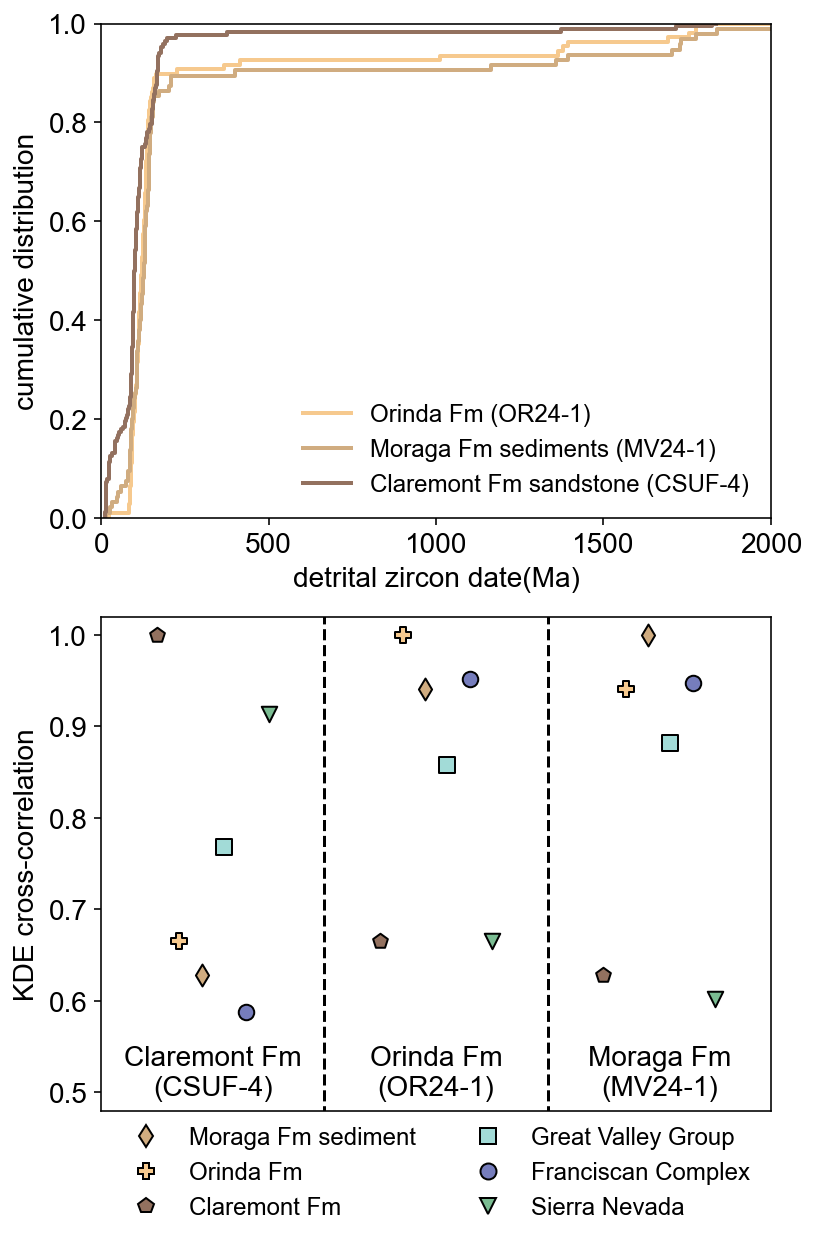

In [13]:
plt.figure(figsize=(6,10))
ax0 = plt.subplot(2,1,1)
Orinda_dates = analyses_df[analyses_df['Sample_ID'] == 'Orinda Fm (OR24-1; this study)']
Moraga_dates = analyses_df[analyses_df['Sample_ID'] == 'Moraga Fm sediments (MV24-1; this study)']
Claremont_dates = analyses_df[analyses_df['Sample_ID'] == 'Claremont Fm sandstone (CSUF-4; this study)']

Orinda_dates_sorted = Orinda_dates['BestAge'].sort_values()
cum_dist = np.linspace(0.,1.,len(Orinda_dates_sorted))
ser_cdf = pd.Series(cum_dist, index=Orinda_dates_sorted)
ser_cdf.plot(drawstyle='steps',label='Orinda Fm (OR24-1)',
             color=Orinda_color,linewidth=2)

Moraga_dates_sorted = Moraga_dates['BestAge'].sort_values()
cum_dist = np.linspace(0.,1.,len(Moraga_dates))
ser_cdf = pd.Series(cum_dist, index=Moraga_dates_sorted)
ser_cdf.plot(drawstyle='steps',label='Moraga Fm sediments (MV24-1)',
             color=Moraga_color,linewidth=2)

Claremont_dates_sorted = Claremont_dates['BestAge'].sort_values()
cum_dist = np.linspace(0.,1.,len(Claremont_dates_sorted))
ser_cdf = pd.Series(cum_dist, index=Claremont_dates_sorted)
ser_cdf.plot(drawstyle='steps',label='Claremont Fm sandstone (CSUF-4)',
             color=Claremont_color,linewidth=2)
ax0.set_ylim(0,1)
ax0.set_xlim(0,2000)
ax0.set_xlabel('detrital zircon date(Ma)',fontsize=14)
ax0.set_ylabel('cumulative distribution',fontsize=14)
plt.legend(fontsize=12,frameon=False)

ax1 = plt.subplot(2,1,2)

x = [1.5,1.7,1.9,2.1,2.3,2.5,
     3.5,3.7,3.9,4.1,4.3,4.5,
     5.5,5.7,5.9,6.1,6.3,6.5]

y = [KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][4],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][1],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][0],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][5],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][6],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][7],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][4],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][1],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][0],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][5],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][6],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][7],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][4],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][1],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][0],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][5],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][6],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][7]]

facecolor = [Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color]

markers = ['p','P','d','s','o','v',
           'p','P','d','s','o','v',
           'p','P','d','s','o','v']

for xp, yp, fc, m in zip(x, y, facecolor, markers):
    plt.scatter(xp, yp, 
                facecolor = fc, 
                marker=m, 
                edgecolor= 'black',
                s=60)

ax1.set_ylabel('KDE cross-correlation',fontsize=14)

legend_elements = [Line2D([0], [0], marker='d', color='black', label='Moraga Fm sediment',
                          markerfacecolor=Moraga_color, markersize=8, linestyle='none'),
                    Line2D([0], [0], marker='P', color='black', label='Orinda Fm',
                                          markerfacecolor=Orinda_color, markersize=8, linestyle='none'),
                    Line2D([0], [0], marker='p', color='black', label='Claremont Fm',
                                          markerfacecolor=Claremont_color, markersize=8, linestyle='none'),
                    Line2D([0], [0], marker='s', color='black', label='Great Valley Group',
                          markerfacecolor='#a2dbd7', markersize=8, linestyle='none'),
                   Line2D([0], [0], marker='o', color='black', label='Franciscan Complex',
                          markerfacecolor='#767dbc', markersize=8, linestyle='none'),
                   Line2D([0], [0], marker='v', color='black', label='Sierra Nevada',
                          markerfacecolor='#7abc92', markersize=8, linestyle='none')
                  ]

ax1.set_xticks([])
ax1.set_ylim(0.48,1.02)
ax1.set_xlim(1,7)
plt.vlines(3,0,1.1,color='black',linestyle='--')
plt.vlines(5,0,1.1,color='black',linestyle='--')
plt.annotate('Claremont Fm\n(CSUF-4)',(2,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('Orinda Fm\n(OR24-1)',(4,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('Moraga Fm\n(MV24-1)',(6,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.gca().legend(handles=legend_elements, ncol=2, loc='center',
                 bbox_to_anchor=(0.25, -0.375, 0.5, 0.5),fontsize=12,frameon=False)
plt.savefig('./Output/sample_comparison.pdf')
plt.show()

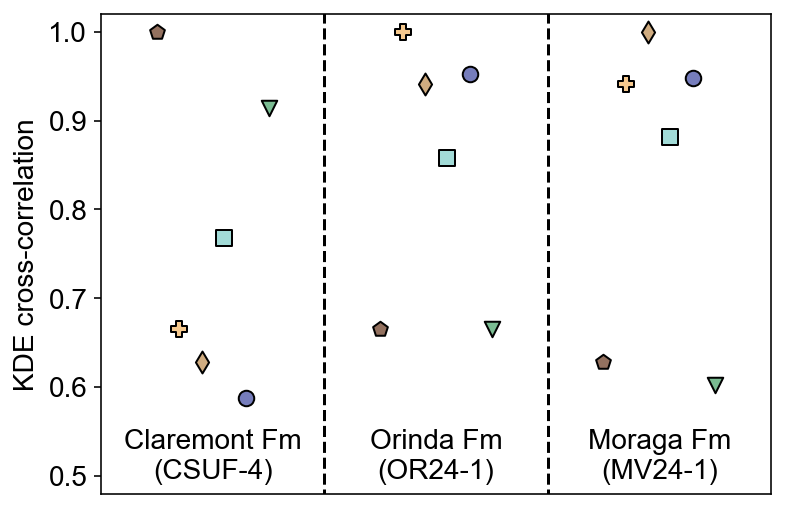

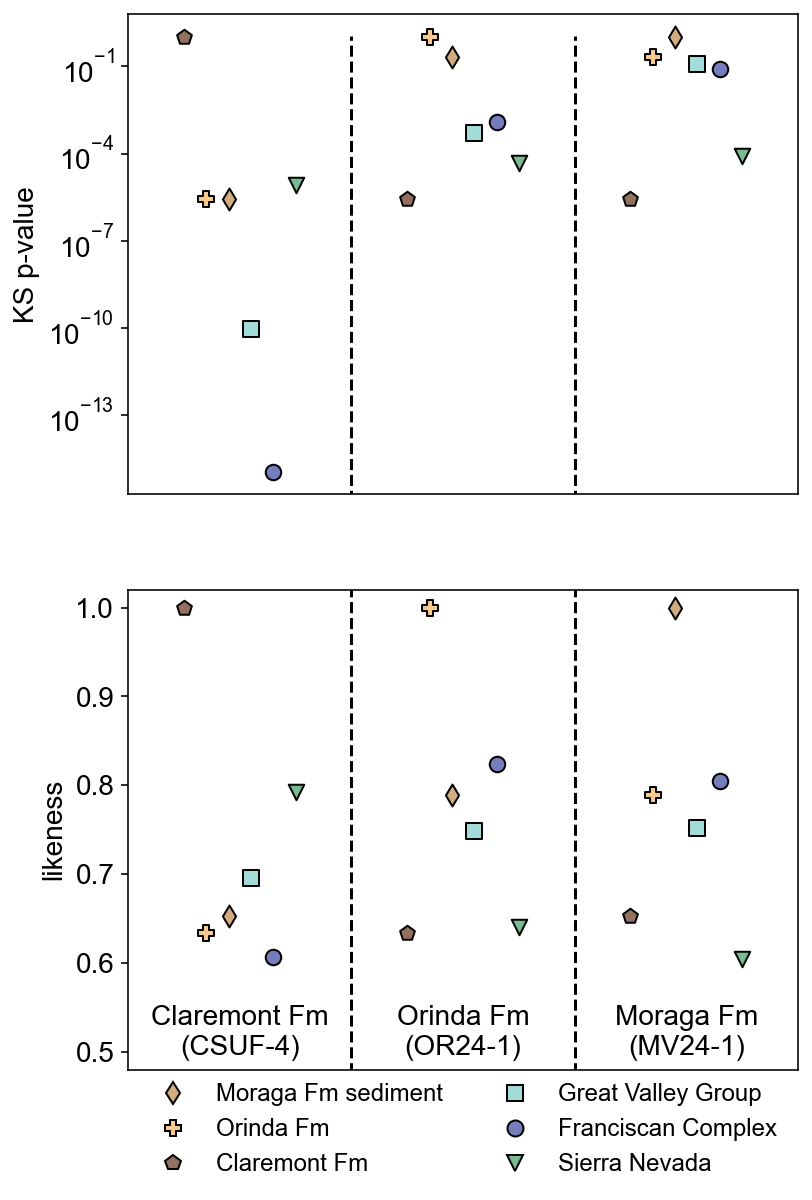

In [14]:
plt.figure(figsize=(6,15))

ax0 = plt.subplot(3,1,1)

x = [1.5,1.7,1.9,2.1,2.3,2.5,
     3.5,3.7,3.9,4.1,4.3,4.5,
     5.5,5.7,5.9,6.1,6.3,6.5]

y = [KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][4],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][1],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][0],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][5],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][6],
     KDE_cross_correlation['Claremont Fm sandstone (CSUF-4; this study)'][7],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][4],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][1],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][0],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][5],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][6],
     KDE_cross_correlation['Orinda Fm (OR24-1; this study)'][7],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][4],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][1],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][0],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][5],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][6],
     KDE_cross_correlation['Moraga Fm sediments (MV24-1; this study)'][7]]

facecolor = [Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color]

markers = ['p','P','d','s','o','v',
           'p','P','d','s','o','v',
           'p','P','d','s','o','v']

for xp, yp, fc, m in zip(x, y, facecolor, markers):
    plt.scatter(xp, yp, 
                facecolor = fc, 
                marker=m, 
                edgecolor= 'black',
                s=60)

ax0.set_ylabel('KDE cross-correlation',fontsize=14)

ax0.set_xticks([])
ax0.set_ylim(0.48,1.02)
ax0.set_xlim(1,7)
plt.vlines(3,0,1.1,color='black',linestyle='--')
plt.vlines(5,0,1.1,color='black',linestyle='--')
plt.annotate('Claremont Fm\n(CSUF-4)',(2,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('Orinda Fm\n(OR24-1)',(4,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('Moraga Fm\n(MV24-1)',(6,0.49),horizontalalignment='center',verticalalignment='bottom')

plt.figure(figsize=(6,15))

ax1 = plt.subplot(3,1,2)

x = [1.5,1.7,1.9,2.1,2.3,2.5,
     3.5,3.7,3.9,4.1,4.3,4.5,
     5.5,5.7,5.9,6.1,6.3,6.5]

y = [KS_pvalue['Claremont Fm sandstone (CSUF-4; this study)'][4],
     KS_pvalue['Claremont Fm sandstone (CSUF-4; this study)'][1],
     KS_pvalue['Claremont Fm sandstone (CSUF-4; this study)'][0],
     KS_pvalue['Claremont Fm sandstone (CSUF-4; this study)'][5],
     KS_pvalue['Claremont Fm sandstone (CSUF-4; this study)'][6],
     KS_pvalue['Claremont Fm sandstone (CSUF-4; this study)'][7],
     KS_pvalue['Orinda Fm (OR24-1; this study)'][4],
     KS_pvalue['Orinda Fm (OR24-1; this study)'][1],
     KS_pvalue['Orinda Fm (OR24-1; this study)'][0],
     KS_pvalue['Orinda Fm (OR24-1; this study)'][5],
     KS_pvalue['Orinda Fm (OR24-1; this study)'][6],
     KS_pvalue['Orinda Fm (OR24-1; this study)'][7],
     KS_pvalue['Moraga Fm sediments (MV24-1; this study)'][4],
     KS_pvalue['Moraga Fm sediments (MV24-1; this study)'][1],
     KS_pvalue['Moraga Fm sediments (MV24-1; this study)'][0],
     KS_pvalue['Moraga Fm sediments (MV24-1; this study)'][5],
     KS_pvalue['Moraga Fm sediments (MV24-1; this study)'][6],
     KS_pvalue['Moraga Fm sediments (MV24-1; this study)'][7]]

facecolor = [Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color]

markers = ['p','P','d','s','o','v',
           'p','P','d','s','o','v',
           'p','P','d','s','o','v']

for xp, yp, fc, m in zip(x, y, facecolor, markers):
    plt.scatter(xp, yp, 
                facecolor = fc, 
                marker=m, 
                edgecolor= 'black',
                s=60)

ax1.set_ylabel('KS p-value',fontsize=14)
ax1.set_yscale('log')

ax1.set_xticks([])
ax1.set_xlim(1,7)
plt.vlines(3,0,1.1,color='black',linestyle='--')
plt.vlines(5,0,1.1,color='black',linestyle='--')

ax2 = plt.subplot(3,1,3)

x = [1.5,1.7,1.9,2.1,2.3,2.5,
     3.5,3.7,3.9,4.1,4.3,4.5,
     5.5,5.7,5.9,6.1,6.3,6.5]

y = [likeness['Claremont Fm sandstone (CSUF-4; this study)'][4],
     likeness['Claremont Fm sandstone (CSUF-4; this study)'][1],
     likeness['Claremont Fm sandstone (CSUF-4; this study)'][0],
     likeness['Claremont Fm sandstone (CSUF-4; this study)'][5],
     likeness['Claremont Fm sandstone (CSUF-4; this study)'][6],
     likeness['Claremont Fm sandstone (CSUF-4; this study)'][7],
     likeness['Orinda Fm (OR24-1; this study)'][4],
     likeness['Orinda Fm (OR24-1; this study)'][1],
     likeness['Orinda Fm (OR24-1; this study)'][0],
     likeness['Orinda Fm (OR24-1; this study)'][5],
     likeness['Orinda Fm (OR24-1; this study)'][6],
     likeness['Orinda Fm (OR24-1; this study)'][7],
     likeness['Moraga Fm sediments (MV24-1; this study)'][4],
     likeness['Moraga Fm sediments (MV24-1; this study)'][1],
     likeness['Moraga Fm sediments (MV24-1; this study)'][0],
     likeness['Moraga Fm sediments (MV24-1; this study)'][5],
     likeness['Moraga Fm sediments (MV24-1; this study)'][6],
     likeness['Moraga Fm sediments (MV24-1; this study)'][7]]

facecolor = [Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color,
             Claremont_color,Orinda_color,Moraga_color,GVG_color,Franciscan_color,Sierra_color]

markers = ['p','P','d','s','o','v',
           'p','P','d','s','o','v',
           'p','P','d','s','o','v']

for xp, yp, fc, m in zip(x, y, facecolor, markers):
    plt.scatter(xp, yp, 
                facecolor = fc, 
                marker=m, 
                edgecolor= 'black',
                s=60)

ax2.set_ylabel('likeness',fontsize=14)

legend_elements = [Line2D([0], [0], marker='d', color='black', label='Moraga Fm sediment',
                          markerfacecolor=Moraga_color, markersize=8, linestyle='none'),
                    Line2D([0], [0], marker='P', color='black', label='Orinda Fm',
                                          markerfacecolor=Orinda_color, markersize=8, linestyle='none'),
                    Line2D([0], [0], marker='p', color='black', label='Claremont Fm',
                                          markerfacecolor=Claremont_color, markersize=8, linestyle='none'),
                    Line2D([0], [0], marker='s', color='black', label='Great Valley Group',
                          markerfacecolor='#a2dbd7', markersize=8, linestyle='none'),
                   Line2D([0], [0], marker='o', color='black', label='Franciscan Complex',
                          markerfacecolor='#767dbc', markersize=8, linestyle='none'),
                   Line2D([0], [0], marker='v', color='black', label='Sierra Nevada',
                          markerfacecolor='#7abc92', markersize=8, linestyle='none')
                  ]

ax2.set_xticks([])
ax2.set_ylim(0.48,1.02)
ax2.set_xlim(1,7)
plt.vlines(3,0,1.1,color='black',linestyle='--')
plt.vlines(5,0,1.1,color='black',linestyle='--')
plt.annotate('Claremont Fm\n(CSUF-4)',(2,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('Orinda Fm\n(OR24-1)',(4,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.annotate('Moraga Fm\n(MV24-1)',(6,0.49),horizontalalignment='center',verticalalignment='bottom')
plt.gca().legend(handles=legend_elements, ncol=2, loc='center',
                 bbox_to_anchor=(0.25, -0.375, 0.5, 0.5),fontsize=12,frameon=False)

plt.show()

## Multi-dimensional scaling
Create a multi-dimensional scaling (MDS) plot for individual samples or groups of samples. <i><b>Revised and updated in detritalpy version 1.3.</b></i>

In [15]:
sampleList = ['Moraga Fm sediments (MV24-1; this study)',
       'Orinda Fm (OR24-1; this study)',
       'Orinda Fm (JG-BH5; Gooley et al., 2021)',
       'Briones Fm (JG-BH8; Gooley et al., 2021)',
       'Claremont Fm sandstone (CSUF-4; this study)',
       'Great Valley Group (Sharman et al. 2015)',
       'Franciscan Complex (Bero et al., 2020)',
       'Sierra magmatic (Chapman et al., 2012)']

ages, errors, numGrains, labels = dFunc.sampleToData(sampleList, main_byid_df, sigma = '2sigma');

Run the model. Note that this may take a while, depending on the number of initializations (n_init) chosen. Increasing the number of initializations increased the likelihood of finding a more optimal fit (i.e., lower stress).

In [16]:
model = dFunc.MDS_class(ages, errors, labels, sampleList, metric=False, criteria='Vmax', bw='optimizedFixed', n_init='metric', 
                        max_iter=1000, x1=0, x2=4500, xdif=1, min_dim=1, max_dim=3, dim=2)

After the model has been run, a number of figures can be generated, in any order.

The QQ matrix plots each sample CDF against the others. A perfect match falls along the dashed line. <i>Note: This is not recommended for large datasets (e.g., >20 samples or sample groups)</i>

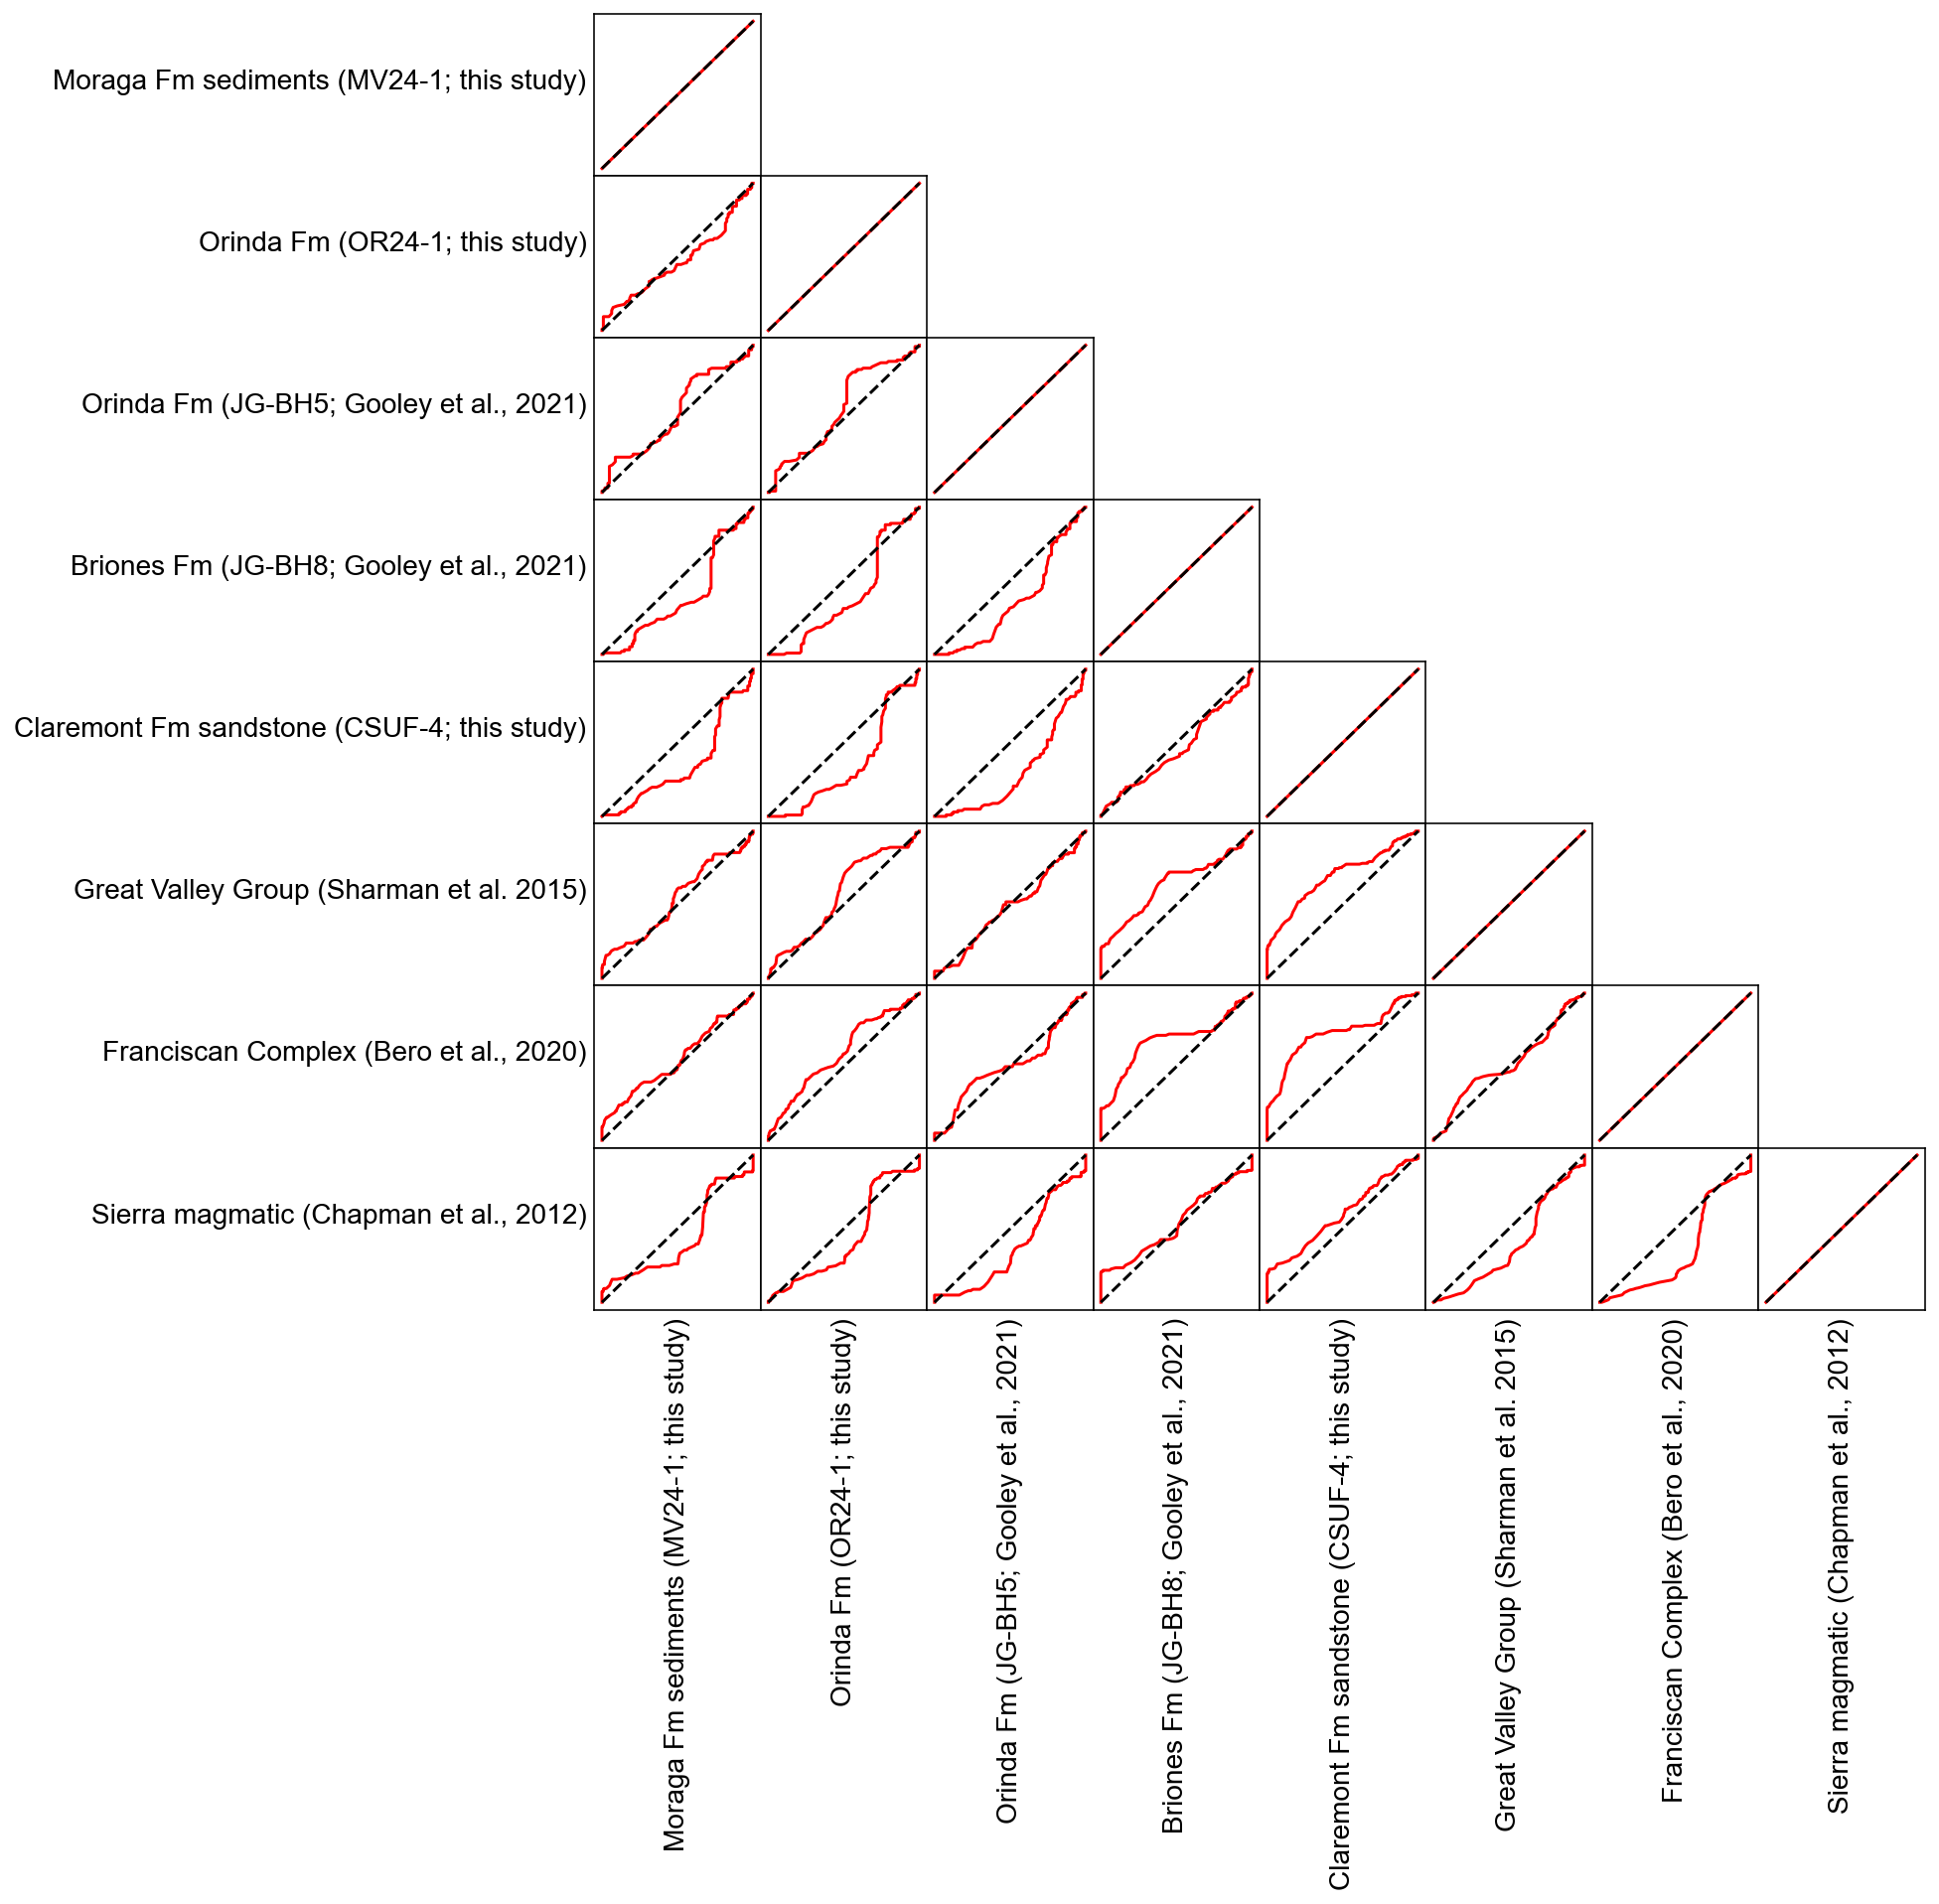

In [17]:
model.QQplot(figsize=(12,12), savePlot=False, fileName='QQplot.pdf', halfMatrix=True)

A heatmap of the sample dissimilarity matrix gives an indication of the data that is going into the MDS algorithm

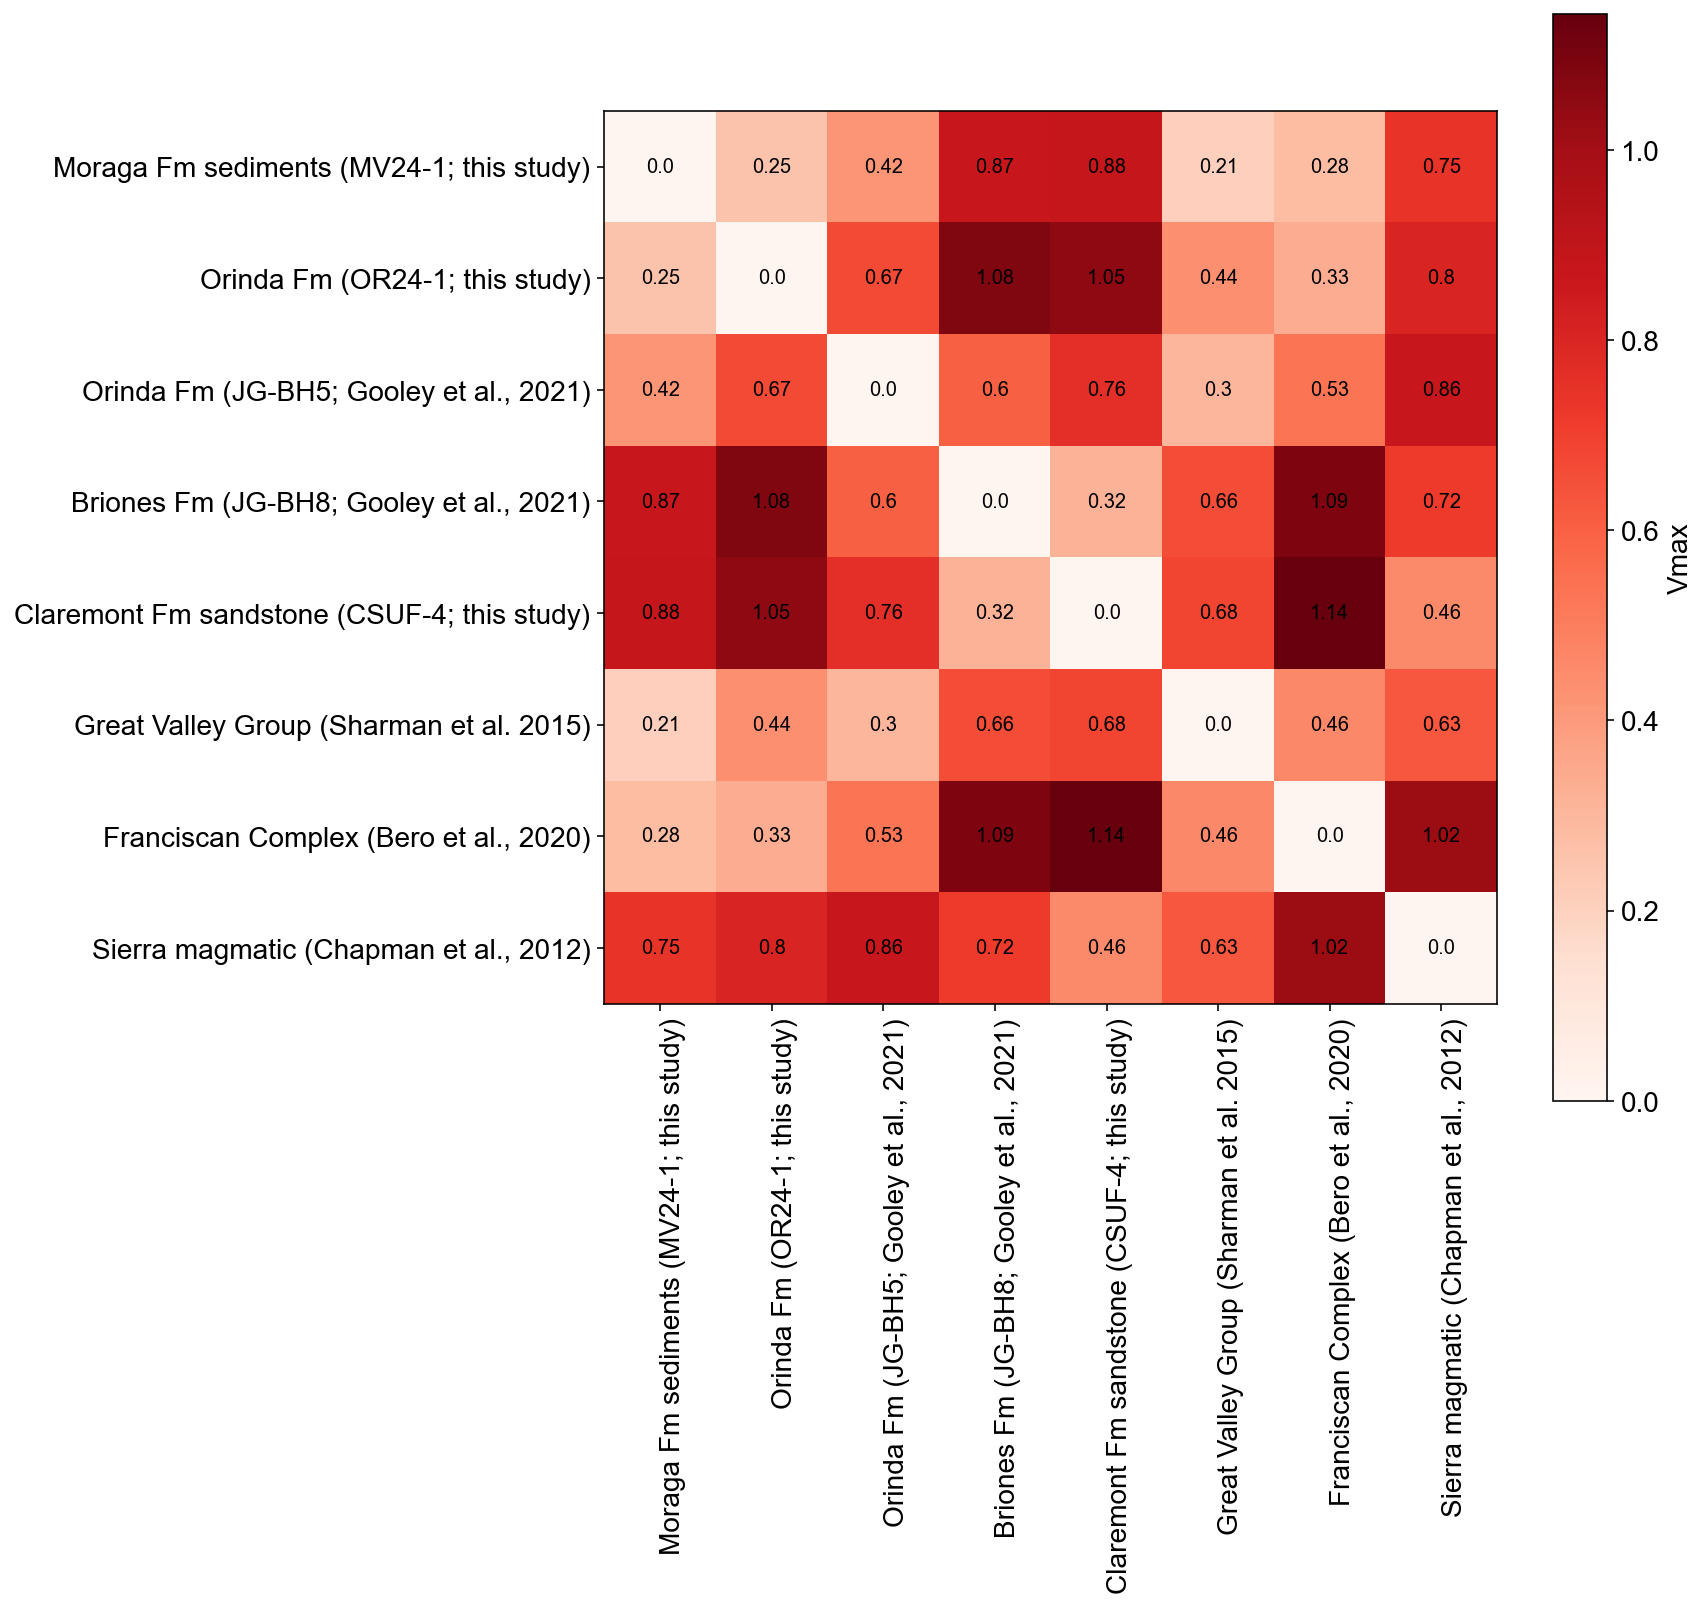

In [18]:
model.heatMap(figsize=(10,10), savePlot=False, fileName='HeatMapPlot.pdf', plotValues=True,
              plotType='distance', fontsize=10)

By setting the keyword argument plotType to equal 'distance', we can plot the Euclidean distance between sample pairs on the MDS plot. There should be a general correlation with the heat mat above, as samples that are more different should be farther apart.

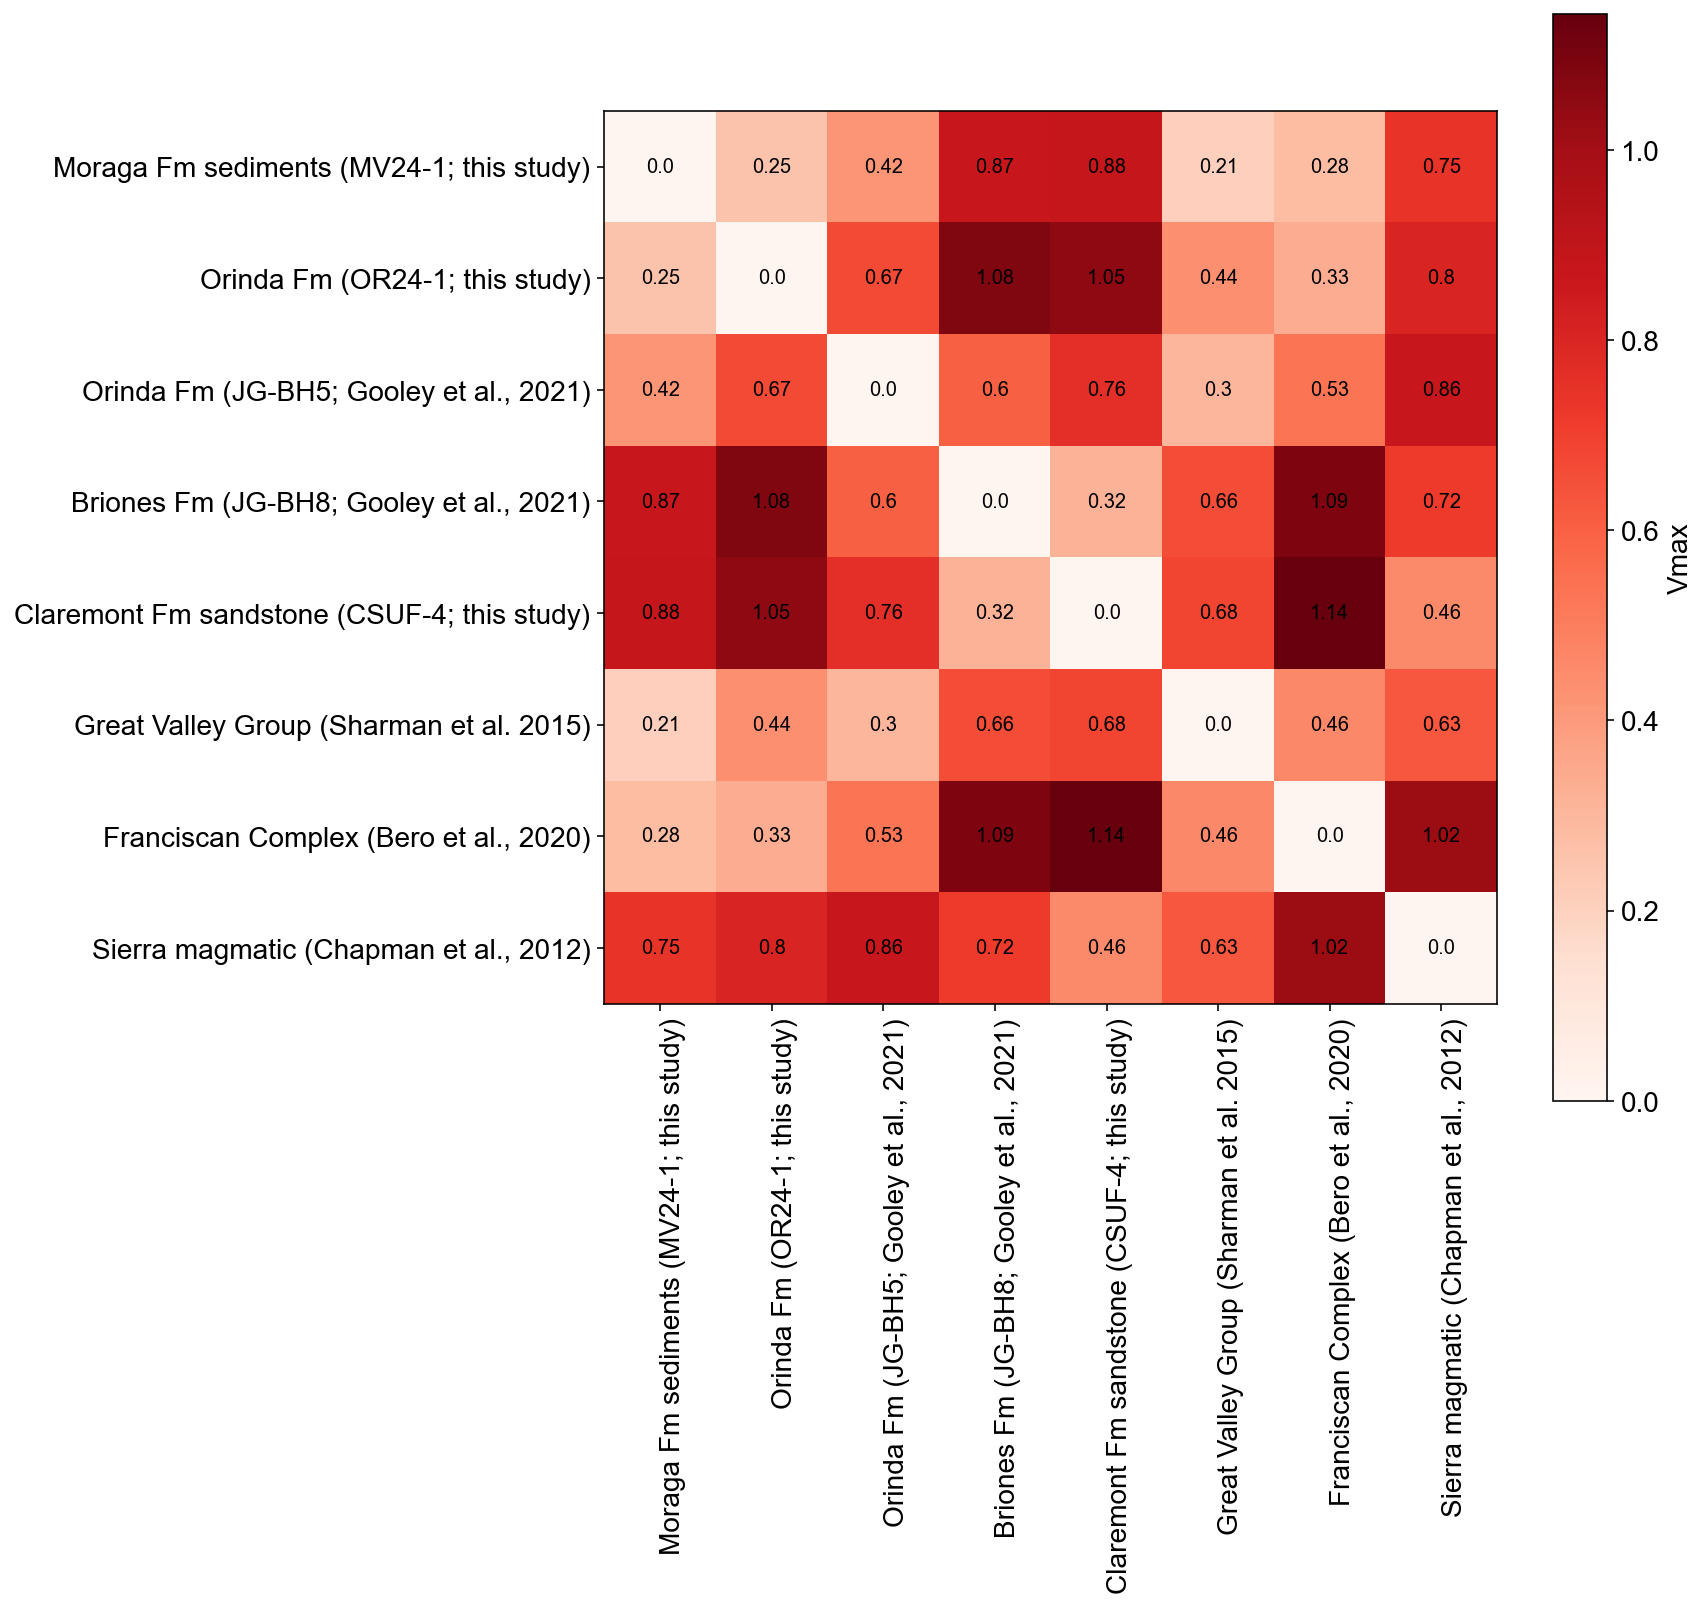

In [19]:
model.heatMap(figsize=(10,10), savePlot=False, fileName='HeatMapPlot.pdf', plotValues=True, plotType='distance', fontsize=10)

A stress plot gives an indication of the goodness-of-fit and how this varies depending on how many dimensions are modeled

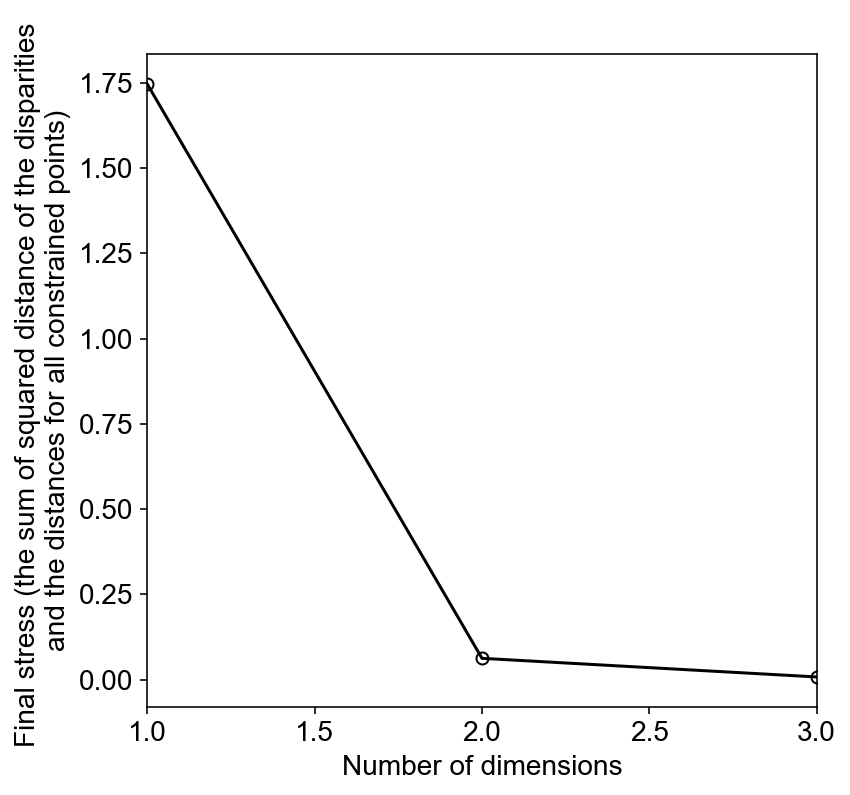

In [20]:
model.stressPlot(figsize=(6,6), savePlot=False, fileName='stressPlot.pdf', stressType='sklearn')

A Shepard plot compares x-y distance on the MDS plot against the dissimilarity metric. Ideally, sample pairs that are far apart on the MDS plot (large distance) will also be the most dissimilar, and visa versa. The amount of scatter gives a sense of the stress value - a lot of scatter means that there's a lot of variance in how well distance on the MDS plot characterizes sample dissimilarity.

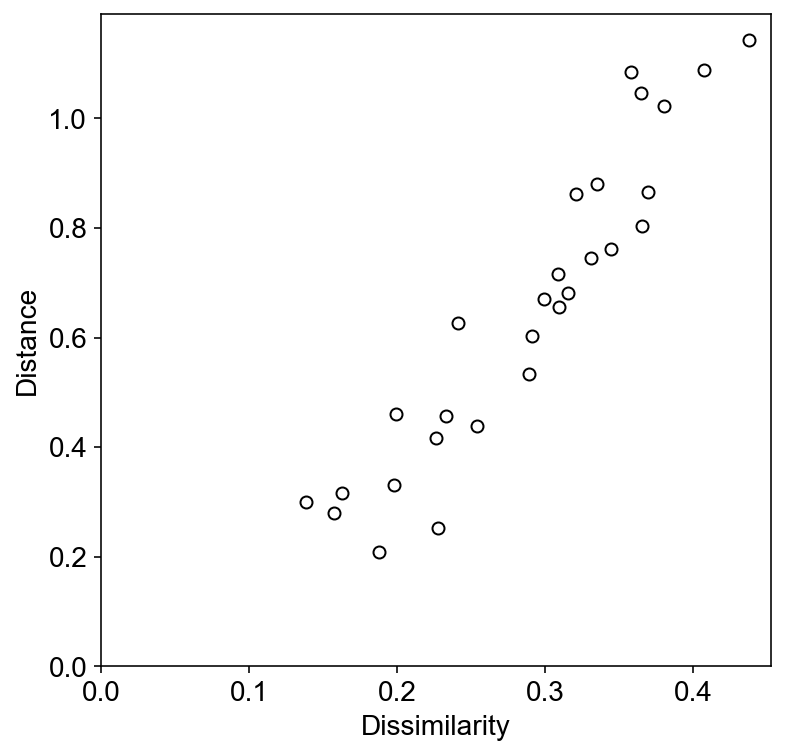

In [21]:
model.shepardPlot(figsize=(6,6), savePlot=False, fileName='shepardPlot.pdf', plotOneToOneLine=False)

The MDS plot is a depiction of sample similarity and dissimilarity (refer to Vermeesch, 2013: Chemical Geology for a more complete description).

Final stress:  0.06263276951925574


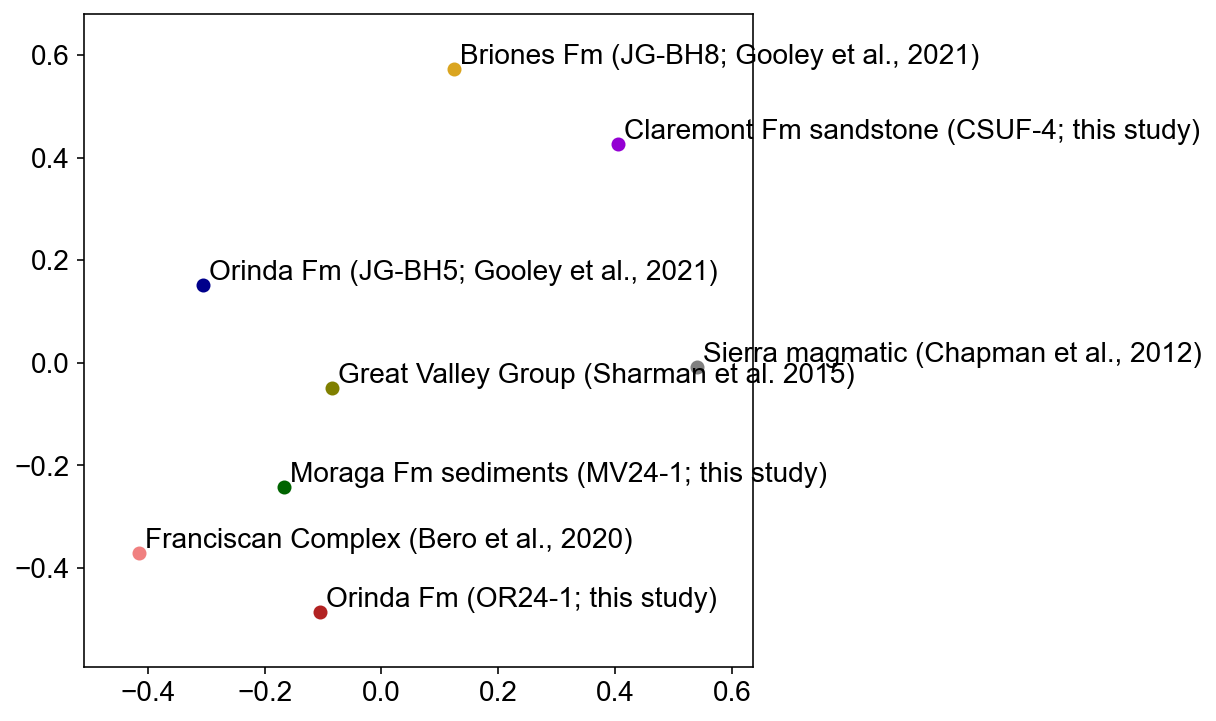

In [22]:
model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, equalAspect=False, 
              stressType='sklearn')

Note that individual samples can be colored accoring to a categorical variable (column name in the 'Samples' table)

Final stress:  0.06263276951925574


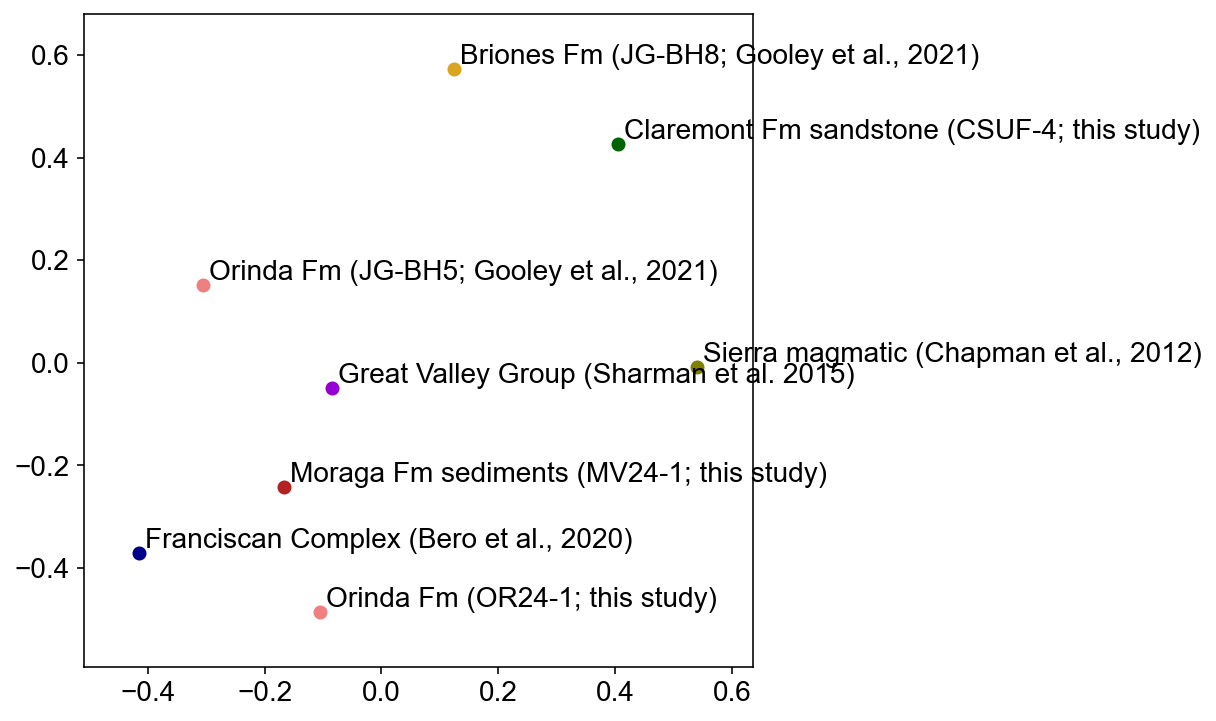

In [23]:
model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, colorBy='Unit', 
              df=main_byid_df, equalAspect=False, stressType='sklearn')

Samples can also be plotted as pie diagrams where bins correspond to different age categories

Final stress:  0.06263276951925574


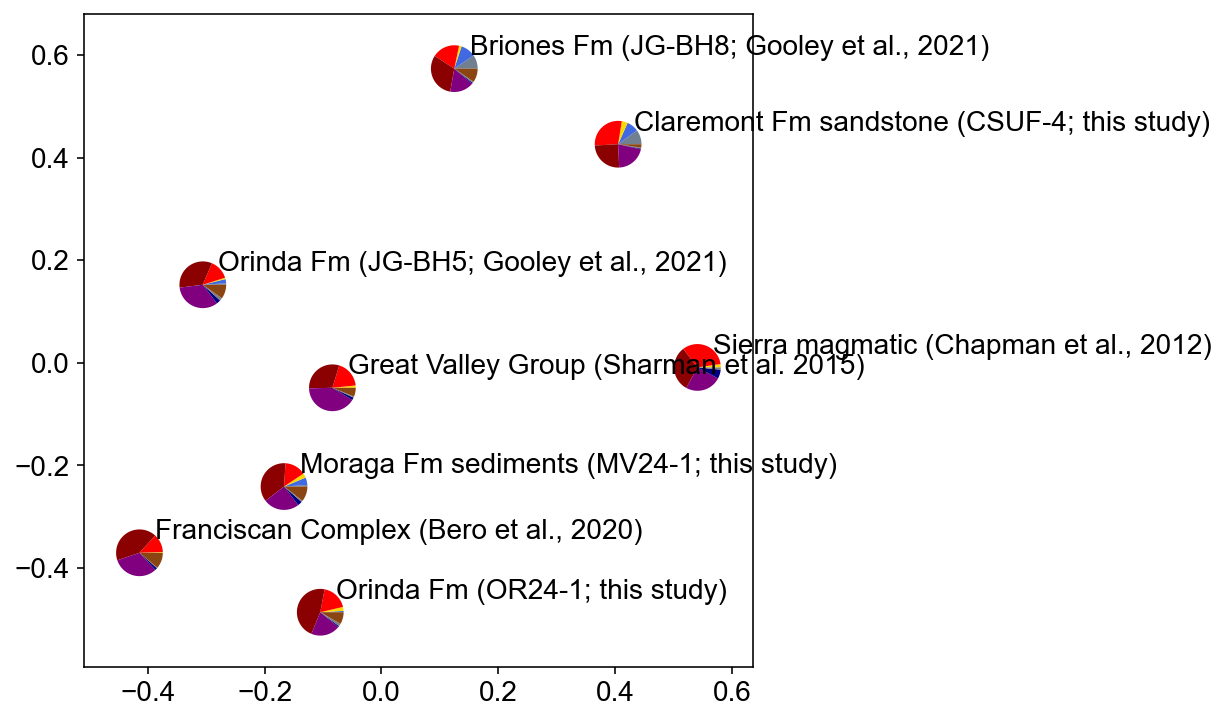

In [24]:
# Sharman et al. 2015 scheme
agebins = [0, 23, 65, 85, 100, 135, 200, 300, 500, 4500]
agebinsc = ['slategray','royalblue','gold','red','darkred','purple','navy','gray','saddlebrown']

model.MDSplot(figsize=(6,6), savePlot=False, fileName='MDSplot.pdf', plotLabels=True, 
              plotPie=True, pieType='Age', pieSize=0.04, agebins=agebins, agebinsc=agebinsc, equalAspect=False)